In [1]:
import pandas as pd
import numpy as np
import MHR as mhr
import sys
import types
import MHR as mhr
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [67]:
dfBooks = pd.read_csv('data/book_sample.csv.gz')

reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
B00BGA9WK2,351,253.079772
B00A3YN0Z0,219,104.237443
B0074BW614,201,451.900498
B00CMQTVK0,165,334.696970
B0094NY3R0,147,232.972789
B0045FM6SU,140,374.121429
B00DVFLJDS,139,352.625899
B009LL9VDG,133,424.443609
B002C7481G,132,501.636364


product=B0001FTVEK ndcg=0.940919241386 (0.940919241386)


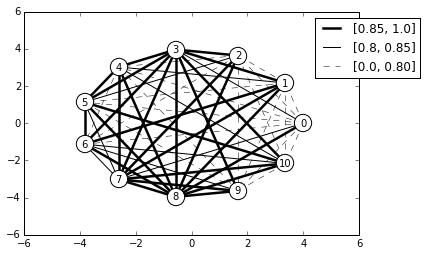

In [4]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)





values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')
labels={}
top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)


G = nx.Graph(matrix[np.ix_(selected_nodes, selected_nodes)])
pos=nx.circular_layout(G,scale=4) #


weights = [d['weight'] for (u,v,d) in G.edges(data=True) ]

ind=0
labels={}
for node in G.nodes():
    labels[node] = ind
    ind=ind+1


        
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.85]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] <0.85 and d['weight'] >=0.8)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <0.8]


nx.draw_networkx_edges(G,pos,edgelist=elarge, width=2.5, label="[0.85, 1.0]")
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1.0, label="[0.8, 0.85]")
nx.draw_networkx_edges(G,pos,edgelist=enone, width=0.5 , style='--' , label="[0.0, 0.80]")

nx.draw_networkx_nodes(G,pos, labels=labels, node_color='w')

nx.draw_networkx_labels(G,pos, labels=labels, font_size=10,font_family='sans-serif')

plt.legend(bbox_to_anchor=(1.2, 1.0))
#plt.title('Weighted similarity graph for the product "B0001FTVEK"')
plt.show()


product=B0001FTVEK ndcg=0.940919241386 (0.940919241386)


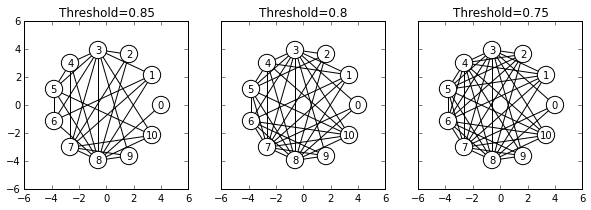

In [5]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)



values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')

top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)



G = nx.Graph(matrix[np.ix_(selected_nodes, selected_nodes)])

pos=nx.circular_layout(G,scale=4) #
#pos=nx.spring_layout(G) #


labelsx={}
ind=0
for node in G.nodes():
    labelsx[node] = ind
    ind=ind+1
    
    

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(10,3))

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.85]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] >=0.8)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.75]


#ax1
nx.draw_networkx_nodes(G,pos, ax=ax1, labels=labelsx, node_color='w')
nx.draw_networkx_edges(G,pos,edgelist=elarge, ax=ax1, width=1, label="[0.8, 1.0]")
nx.draw_networkx_labels(G,pos,ax=ax1,labels=labelsx, font_size=10,font_family='sans-serif')
ax1.set_title('Threshold=0.85 ')

#ax2
nx.draw_networkx_edges(G,pos,edgelist=esmall, ax=ax2, width=1, label="[0.8, 1.0]")
nx.draw_networkx_nodes(G,pos, labels=labelsx, ax=ax2,node_color='w')
nx.draw_networkx_labels(G,pos,labels=labelsx ,ax=ax2,font_size=10,font_family='sans-serif')
ax2.set_title('Threshold=0.8 ')

#ax2
nx.draw_networkx_edges(G,pos,edgelist=enone, ax=ax3, width=1, label="[0.8, 1.0]")
nx.draw_networkx_nodes(G,pos , labels=labelsx, ax=ax3,node_color='w')
nx.draw_networkx_labels(G,pos, labels=labelsx, ax=ax3,font_size=10,font_family='sans-serif')
ax3.set_title('Threshold=0.75 ')




In [28]:
#to_keep=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.6]
#x=G.subgraph(to_keep)
G = nx.Graph(matrix[np.ix_(selected_nodes, selected_nodes)])

SG=nx.Graph( [ (u,v,d) for u,v,d in G.edges(data=True) if d ['weight']>=0.7] )
sorted(nx.connected_components(SG), key = len, reverse=True)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]

In [6]:
selected_nodes
count=0
for i in selected_nodes:
    print "________"
    print str(count)+ " "+  str(reviews_features[reviews_features['asin']=='B0001FTVEK']['overall'].values[i])
    print reviews_features[reviews_features['asin']=='B0001FTVEK']['reviewText'].values[i] 
    count=count+1

________
0 5.0
When I first noticed this product on an Amazon best-seller list, my initial response was "what a great idea." My second was "sounds too good to be true." My third, after receiving my order and slipping these headphones on for the first time, was simply "WOW!"From the elegant, ergonamic design to the superb sound, the Sennheiser RS-120s can't be beat.The headphones come with three connection adapters, so they'll work with just about any TV, radio, stereo, DVD or game system. The base unit is small, inobtrusive and leaves a small enough footprint that you can find a spot for it just about anywhere.But the bottom line is they work -- and they work well. I have them set up in my bedroom and connected to my TV so I can unwind late at night without keeping my spouse awake. And on Saturday afternoons I can have the game on with the volume pumped up without a peep of complaint from her or the kids (and even if they did, I'd never hear them anyway :-) Of course, I can walk around

In [48]:
pd.DataFrame(matrix[np.ix_(selected_nodes, selected_nodes)].round(3)).head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000,0.522,0.573,0.835,0.745,0.711,0.741,0.838,0.884,0.596,0.623
1,0.522,-0.000,0.624,0.940,0.804,0.797,0.868,0.874,0.903,0.697,0.679
2,0.573,0.624,0.000,0.912,0.767,0.831,0.758,0.875,0.921,0.680,0.640
3,0.835,0.940,0.912,-0.000,0.906,0.850,0.865,0.894,0.880,0.885,0.951
4,0.745,0.804,0.767,0.906,-0.000,0.865,0.760,0.871,0.937,0.774,0.813
5,0.711,0.797,0.831,0.850,0.865,-0.000,0.863,0.829,0.867,0.750,0.850
6,0.741,0.868,0.758,0.865,0.760,0.863,-0.000,0.816,0.903,0.839,0.846
7,0.838,0.874,0.875,0.894,0.871,0.829,0.816,-0.000,0.910,0.859,0.952
8,0.884,0.903,0.921,0.880,0.937,0.867,0.903,0.910,0.000,0.868,0.927
9,0.596,0.697,0.680,0.885,0.774,0.750,0.839,0.859,0.868,-0.000,0.710


In [168]:
pd.DataFrame(matrix[np.ix_(selected_nodes, selected_nodes)].round(3)).to_latex()

'\\begin{tabular}{lrrrrrrrrrrr}\n\\toprule\n{} &     0  &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\\\\n\\midrule\n0  &  0.000 &  0.585 &  0.570 &  0.701 &  0.689 &  0.643 &  0.719 &  0.704 &  0.795 &  0.768 &  0.716 \\\\\n1  &  0.585 & -0.000 &  0.643 &  0.738 &  0.759 &  0.758 &  0.733 &  0.773 &  0.813 &  0.806 &  0.787 \\\\\n2  &  0.570 &  0.643 & -0.000 &  0.703 &  0.714 &  0.693 &  0.789 &  0.645 &  0.783 &  0.846 &  0.756 \\\\\n3  &  0.701 &  0.738 &  0.703 & -0.000 &  0.791 &  0.784 &  0.855 &  0.814 &  0.849 &  0.865 &  0.881 \\\\\n4  &  0.689 &  0.759 &  0.714 &  0.791 & -0.000 &  0.706 &  0.777 &  0.843 &  0.837 &  0.858 &  0.854 \\\\\n5  &  0.643 &  0.758 &  0.693 &  0.784 &  0.706 & -0.000 &  0.800 &  0.721 &  0.786 &  0.862 &  0.797 \\\\\n6  &  0.719 &  0.733 &  0.789 &  0.855 &  0.777 &  0.800 & -0.000 &  0.897 &  0.849 &  0.833 &  0.885 \\\\\n7  &  0.704 &  0.773 &  0.645 &  0.814 &  0.843 &  0.721 &  0.897 & -0.000 &  0.8

In [56]:
np.arange(0,1,0.01)

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])

In [68]:
 mhr.executeFromDf(dfBooks)

product=0002051850 ndcg=0.848203966461 (0.848203966461)
product=000224053X ndcg=0.823215088673 (0.798226210886)
product=0006393195 ndcg=0.803903075728 (0.765279049838)
product=0006530702 ndcg=0.808935121955 (0.824031260634)
product=0007157150 ndcg=0.827078851538 (0.899653769873)
product=0007167040 ndcg=0.830774038419 (0.84924997282)
product=000721278X ndcg=0.836472839169 (0.870665643671)
product=0007228023 ndcg=0.847279011129 (0.922922214848)
product=0007231601 ndcg=0.850502057585 (0.876286429238)
product=000779021X ndcg=0.842439562966 (0.769877111387)
product=0026045702 ndcg=0.847589770169 (0.899091842201)
product=0029109752 ndcg=0.848695732021 (0.86086131239)
product=006000942X ndcg=0.8523771504 (0.896554170951)
product=0060083816 ndcg=0.850239556166 (0.822450831119)
product=0060084332 ndcg=0.851016701652 (0.861896738469)
product=0060175869 ndcg=0.852557493978 (0.87566937886)
product=0060192119 ndcg=0.847017629043 (0.758379790092)


KeyboardInterrupt: 

In [158]:
eletronic_a=[]
eletronic_b=[]
eletronic_dinamic_t_a=[]
eletronic_dinamic_t_b=[]


book_a = []
book_dinamic_t_a =[]
for i in np.arange(0,1,0.05):
    print "limiar="+str(i)
    
    #eletronic a
    df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B00FNPD1OY'],0.893,i+1)
    eletronic_a.append(ndcg_mhr[0])
    
    df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B00FNPD1OY'],0.893,i-1)
    eletronic_dinamic_t_a.append(ndcg_mhr[0])
    
    #eletronic b
    df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0014F9U6U'],0.893,i+1)
    eletronic_b.append(ndcg_mhr[0])
    
    df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0014F9U6U'],0.893,i-1)
    eletronic_dinamic_t_b.append(ndcg_mhr[0])
    
    
    
    #books
    df,ndcg_mhr = mhr.executeFromDf(dfBooks[dfBooks['asin']=='000721278X'],0.893,i+1)
    book_a.append(ndcg_mhr[0])
    df,ndcg_mhr = mhr.executeFromDf(dfBooks[dfBooks['asin']=='000721278X'],0.893,i-1)
    book_dinamic_t_a.append(ndcg_mhr[0])

    for j in xrange(11):
        print " node="+str(j) + " degree="+ str(len(np.where(matrix[np.ix_(selected_nodes, selected_nodes)][j]>=i)[0])) + " real_helpfulness="+str(values_test[j])

limiar=0.0
passou aqui
product=B00FNPD1OY ndcg=0.654659840158 (0.654659840158)
product=B00FNPD1OY ndcg=0.654659840158 (0.654659840158)
passou aqui
product=B0014F9U6U ndcg=0.904036560077 (0.904036560077)
product=B0014F9U6U ndcg=0.904036560077 (0.904036560077)
passou aqui
product=000721278X ndcg=0.884782523055 (0.884782523055)
product=000721278X ndcg=0.884782523055 (0.884782523055)
 node=0 degree=11 real_helpfulness=0.913043478261
 node=1 degree=10 real_helpfulness=0.906666666667
 node=2 degree=11 real_helpfulness=0.8
 node=3 degree=10 real_helpfulness=0.95
 node=4 degree=10 real_helpfulness=0.888888888889
 node=5 degree=10 real_helpfulness=0.8
 node=6 degree=10 real_helpfulness=1.0
 node=7 degree=10 real_helpfulness=1.0
 node=8 degree=11 real_helpfulness=0.666666666667
 node=9 degree=10 real_helpfulness=0.75
 node=10 degree=11 real_helpfulness=0.936842105263
limiar=0.05
passou aqui
product=B00FNPD1OY ndcg=0.585002968819 (0.585002968819)
product=B00FNPD1OY ndcg=0.585002968819 (0.58500296

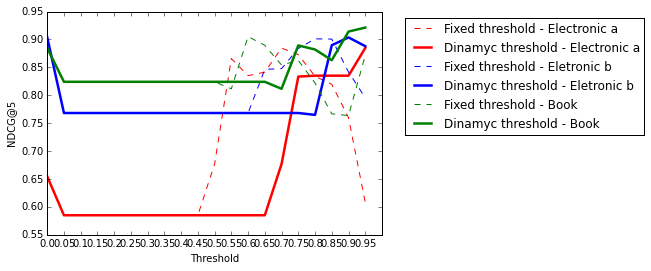

In [159]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

#eletronic_dinamic_t_a

plt.plot(eletronic_a,'--r',label="Fixed threshold - Electronic a")
plt.plot(eletronic_dinamic_t_a ,'-r',linewidth=2.5,label="Dinamyc threshold - Electronic a")

plt.plot(eletronic_b ,'--b',label="Fixed threshold - Eletronic b")
plt.plot(eletronic_dinamic_t_b ,'-b',linewidth=2.5,label="Dinamyc threshold - Eletronic b")


plt.plot(book_a ,'--g',label="Fixed threshold - Book")
plt.plot(book_dinamic_t_a ,'-g',linewidth=2.5,label="Dinamyc threshold - Book")

plt.legend(bbox_to_anchor=(1.8, 1.0))
plt.xticks( np.arange(0,20,1), np.arange(0,1,0.05))
plt.xlabel('Threshold')
plt.ylabel('NDCG@5')

#plt.xticks(np.arange(min(eletronic_a), max(eletronic_a), 1.0))

plt.show()

In [175]:
#eletronic_b
x=np.arange(0,1,0.05)
x[np.argmax(book_a)]
#np.argmax(np.array(eletronic_b))
#eletronic_a

0.60000000000000009

product=B0001FTVEK ndcg=0.940919241386 (0.940919241386)


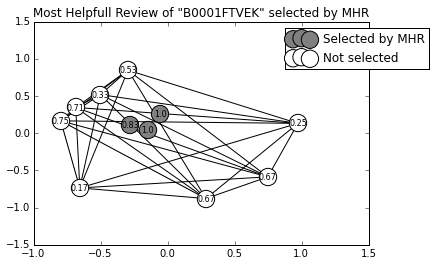

In [35]:
import matplotlib.pyplot as plt
df,ndcg_mhr = mhr.executeFromDf(reviews_features[reviews_features['asin']=='B0001FTVEK'])
#print reviews_features[reviews_features['asin']=='B00001WRSJ']['powerWithStar'].values
matrix, bin_matrix= mhr.getMatrix()
scores= mhr.getScores()
#import pandas as pd
import networkx as nx
#input_data = pd.read_csv('test.csv', index_col=0)

threshold = np.mean(matrix)*0.8
#for row in range(len(matrix)):
#    for col in range(len(matrix)):
#        if matrix[row, col] < threshold:
#            bin_matrix[row, col] = 1.0
#            #degrees[row] += 1
#        else:
#            bin_matrix[row, col] = 0
    
G = nx.Graph(bin_matrix)
#G=nx.cubical_graph(bin_matrix)





pos=nx.spring_layout(G,k=1) #


values_test = df['helpfulness'].values
#scores =df['powerWithStar'].values


node_sizes = scores * 6000


ind = (-np.array(scores)).argsort()
a = np.array(values_test)[ind]
            
            
            
#nx.draw_networkx_labels(G,pos,labels,node_size = node_sizes,font_size=8,font_color='r')

labels = {}
top_nodes=(-np.array(scores)).argsort()[:3]
bot_nodes= (np.array(values_test)).argsort()[:8]

selected_nodes=np.concatenate((top_nodes, bot_nodes), axis=0)
for node in G.nodes():
    if node not in top_nodes:
        G.remove_node(node)
    else:
        labels[node] = round(values_test[node],2)
        #del labels[node]
        #node_sizes = np.delete(node_sizes, node, 0)
        #del node_sizes[node]
        #print "removing " + str(node)
        #break

nx.draw_networkx_nodes(G,pos,labels=labels,  node_color='grey',label="Selected by MHR")

G = nx.Graph(matrix)
for node in G.nodes():
    if node not in bot_nodes:
        G.remove_node(node)
    else:
        labels[node] = round(values_test[node],2)
        #del labels[node]
        #node_sizes = np.delete(node_sizes, node, 0)
        #del node_sizes[node]
        #print "removing " + str(node)
        #break
nx.draw_networkx_nodes(G,pos,labels=labels, node_color='w',label="Not selected")

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.95]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] <0.8 and d['weight'] >=0.6)]
enone=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <0.6]


nx.draw_networkx_edges(G,pos,edgelist=elarge, width=0.2, )
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=0,)
nx.draw_networkx_edges(G,pos,edgelist=enone, width=0.0 , style='dashed', )
nx.draw_networkx_edges(G,pos)

plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Most Helpfull Review of "B0001FTVEK" selected by MHR')
nx.draw_networkx_labels(G,pos,labels=labels,font_size=8,font_family='sans-serif')

plt.show()
